# Convolutional Neural Network

### Importing the libraries

In [51]:
# Importing the necessary libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os


In [52]:
# Importing libraries for image visualization
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

## Part 1 - Data Preprocessing

### Preprocessing the Training set

In [53]:
# Preprocessing the Training set
train_data_gen = ImageDataGenerator(
    rescale=1.0/255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

training_set = train_data_gen.flow_from_directory(
    r"C:\Users\udaya\courses\machine_learning\Project\Project - CNN for Image Classification\dataset\training_set",
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary'
)

Found 8000 images belonging to 2 classes.


### Preprocessing the Test set

In [54]:
# Preprocessing the Test set
test_data_gen = ImageDataGenerator(rescale=1.0/255)

test_set = test_data_gen.flow_from_directory(
    r"C:\Users\udaya\courses\machine_learning\Project\Project - CNN for Image Classification\dataset\test_set",
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary'
)

Found 2000 images belonging to 2 classes.


## Part 2 - Building the CNN

### Initialising the CNN

In [55]:
# Initialising the CNN
cnn = Sequential()

### Step 1 - Convolution

In [56]:
from tensorflow.keras.layers import InputLayer


In [57]:
# Adding the first convolutional layer
cnn.add(InputLayer(input_shape=(64, 64, 3)))
cnn.add(Conv2D(filters=32, kernel_size=3, activation='relu'))

### Step 2 - Pooling

In [58]:
# Adding the first pooling layer
cnn.add(MaxPooling2D(pool_size=2, strides=2))

### Adding a second convolutional layer

In [59]:
# Adding a second convolutional layer and pooling
cnn.add(Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(MaxPooling2D(pool_size=2, strides=2))

### Step 3 - Flattening

In [60]:
# Flattening the layers
cnn.add(Flatten())

### Step 4 - Full Connection

In [61]:
# Adding a fully connected layer
cnn.add(Dense(units=128, activation='relu'))
cnn.add(Dropout(0.5))  # Helps prevent overfitting

### Step 5 - Output Layer

In [62]:
# Adding the output layer
cnn.add(Dense(units=1, activation='sigmoid'))

## Part 3 - Training the CNN

### Compiling the CNN

In [63]:
# Compiling the CNN
cnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

### Training the CNN on the Training set and evaluating it on the Test set

In [64]:
# Training the CNN on the Training set and evaluating it on the Test set
cnn.fit(
    x=training_set,
    validation_data=test_set,
    epochs=25  # You can adjust the number of epochs based on performance and time
)

Epoch 1/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 51s 199ms/step - accuracy: 0.5519 - loss: 0.6914 - val_accuracy: 0.6640 - val_loss: 0.6212
Epoch 2/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 23s 90ms/step - accuracy: 0.6587 - loss: 0.6225 - val_accuracy: 0.6975 - val_loss: 0.5804
Epoch 3/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 22s 89ms/step - accuracy: 0.6943 - loss: 0.5781 - val_accuracy: 0.7425 - val_loss: 0.5280
Epoch 4/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 22s 90ms/step - accuracy: 0.7215 - loss: 0.5561 - val_accuracy: 0.7530 - val_loss: 0.5133
Epoch 5/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 23s 93ms/step - accuracy: 0.7452 - loss: 0.5146 - val_accuracy: 0.7730 - val_loss: 0.4843
Epoch 6/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 22s 86ms/step - accuracy: 0.7542 - loss: 0.5051 - val_accuracy: 0.7715 - val_loss: 0.4740
Epoch 7/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 23s 90ms/step - accuracy: 0.7626 - loss: 0.4874 - val_accuracy: 0.7585 - val_loss: 0.5006
Epoch 8/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 22s 89ms/step - accuracy: 0.7703 - loss: 0.4748 -

## Part 4 - Making a single prediction

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
The model predicts this image is a: Dog


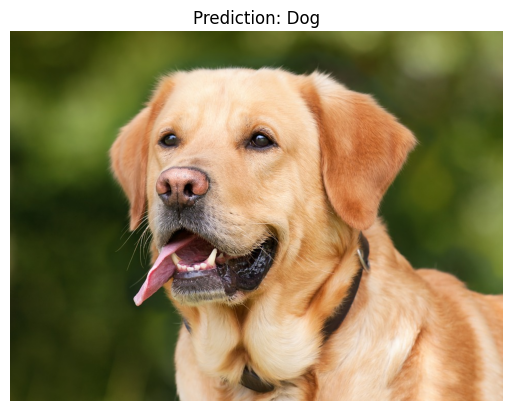

In [66]:
import numpy as np
from tensorflow.keras.utils import load_img, img_to_array

# Path to the image for prediction
image_path = r"C:\Users\udaya\courses\machine_learning\Project\Project - CNN for Image Classification\dataset\single_prediction\cat_or_dog_1.jpg"

# Load the image
test_image = load_img(image_path, target_size=(64, 64))  # Resize to match the input size of the CNN
test_image = img_to_array(test_image)  # Convert image to array
test_image = np.expand_dims(test_image, axis=0)  # Add a batch dimension

# Make the prediction
result = cnn.predict(test_image)
if training_set.class_indices['cats'] == 0:
    predicted_class = 'Cat' if result[0][0] < 0.5 else 'Dog'
else:
    predicted_class = 'Dog' if result[0][0] < 0.5 else 'Cat'

print(f"The model predicts this image is a: {predicted_class}")

# Display the predicted image
img = mpimg.imread(image_path) 
plt.imshow(img)  
plt.title(f"Prediction: {predicted_class}")  
plt.axis('off')  
plt.show()